                                        ## Lead Score Case Study

### Problem Statement:

An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### The following are the steps used:

1. Data Cleaning.
2. Exploratory Data Analysis
3. Dummy variables creation
4. Train-Test Split
5. Model Building
6. Model Evaluation
7. Prediction
8. Conclusion

## Imported Required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ld_df = pd.read_csv('Leads.csv')
ld_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
ld_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
ld_df.shape

(9240, 37)

In [6]:
# Duplicate check 
ld_df.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [7]:
ld_df.duplicated(subset = ['Lead Number'], keep = False).sum()

0

#### Commet
- Prospect ID and Lead Number has not duplicate values
- Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

## Exploratory Data Analysis

### Data Cleaning

In [8]:
# Prospect ID & Lead Number are dropped since they all have unique values
ld_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [9]:
# Converted "Select" values to NaN
ld_df = ld_df.replace("Select", np.nan)

In [10]:
ld_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [11]:
# Unique valued columns are dropped
ld_df = ld_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [12]:
# Null values in each rows are checked after dropping
ld_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [13]:
# Percentage of null value
round(100*(ld_df.isnull().sum())/len(ld_df.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [14]:
# Columns with more than 45% missing values are dropped
ld_df = ld_df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education'],axis =1)


In [15]:
ld_df.shape

(9240, 23)

In [16]:
# Null values percentage are checked
round(100*(ld_df.isnull().sum()/len(ld_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Comment
- There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns.
- So, instead we are going to replace the NaN values with "NA". This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [17]:
ld_df["Specialization"] = ld_df["Specialization"].fillna("NA")
ld_df["City"] = ld_df["City"].fillna("NA")
ld_df["Tags"] = ld_df["Tags"].fillna("NA")
ld_df["What matters most to you in choosing a course"] = ld_df["What matters most to you in choosing a course"].fillna("NA")
ld_df["What is your current occupation"] = ld_df["What is your current occupation"].fillna("NA")
ld_df["Country"] = ld_df["Country"].fillna("NA")
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [18]:
# Null values percentage are checked
round(100*(ld_df.isnull().sum()/len(ld_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [19]:
ld_df.shape

(9240, 23)

### Categorical Attributes Analysis

In [20]:
ld_df["Country"].value_counts()

India                   6492
NA                      2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [21]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "NA":
        category = "NA"
    else:
        category = "not in india"
    return category

ld_df["Country"] = ld_df.apply(lambda x:slots(x["Country"]), axis = 1)
ld_df["Country"].value_counts()

India           6492
NA              2461
not in india     287
Name: Country, dtype: int64

In [22]:
# Since India is the most common occurence among the non-missing values we can impute all NA values with India

ld_df["Country"] = ld_df["Country"].replace("NA","India")
ld_df["Country"].value_counts()

India           8953
not in india     287
Name: Country, dtype: int64

In [23]:
# Checked percent of lose if the null values are removed
round(100*(sum(ld_df.isnull().sum(axis=1) > 1)/ld_df.shape[0]),2)

1.48

In [24]:
ld_df = ld_df[ld_df.isnull().sum(axis=1) <1]

In [25]:
# Percentage of missing values are rechecked
round(100*(ld_df.isnull().sum()/len(ld_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [26]:
ld_df.shape

(9074, 23)

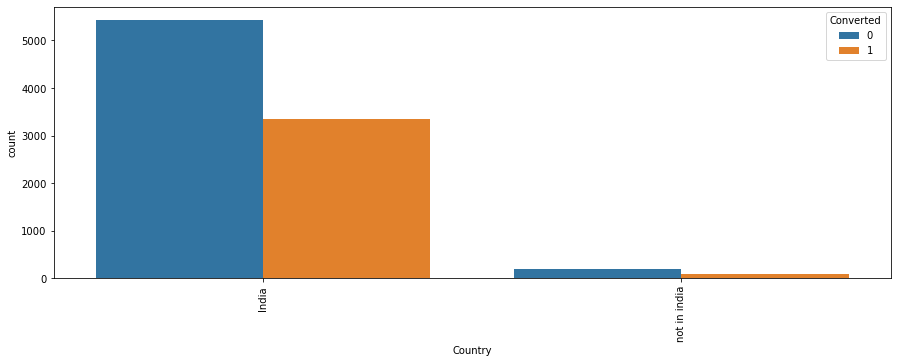

In [27]:
# Plotting spread of country columnn after replacing NaN values

plt.figure(figsize = (15,5))
s1 = sns.countplot(ld_df.Country, hue = ld_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation = 90)
plt.show()

#### Comment
- As we can see the number of values for India are quite high (97% of the data nearly), so this column can be dropped

In [28]:
# Ceating a list of columns to be droppped
columns_to_drop=["Country"]

In [29]:
# Check the value counts of "City" column
ld_df["City"].value_counts(dropna = False)

NA                             3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

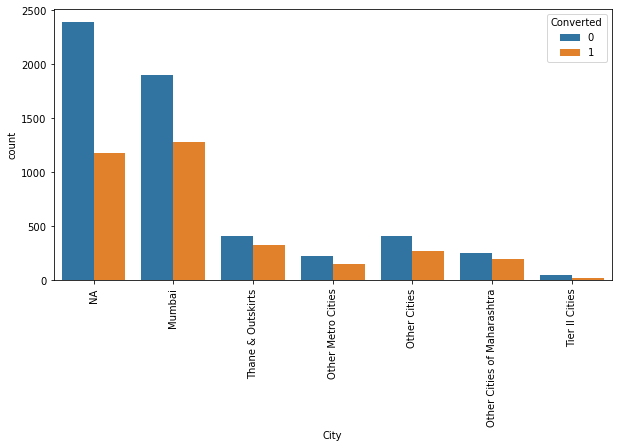

In [30]:
# Plotting spread of city columnn
plt.figure(figsize = (10,5))
s1 = sns.countplot(ld_df.City, hue = ld_df.Converted)
s1.set_xticklabels (s1.get_xticklabels(), rotation = 90)
plt.show()

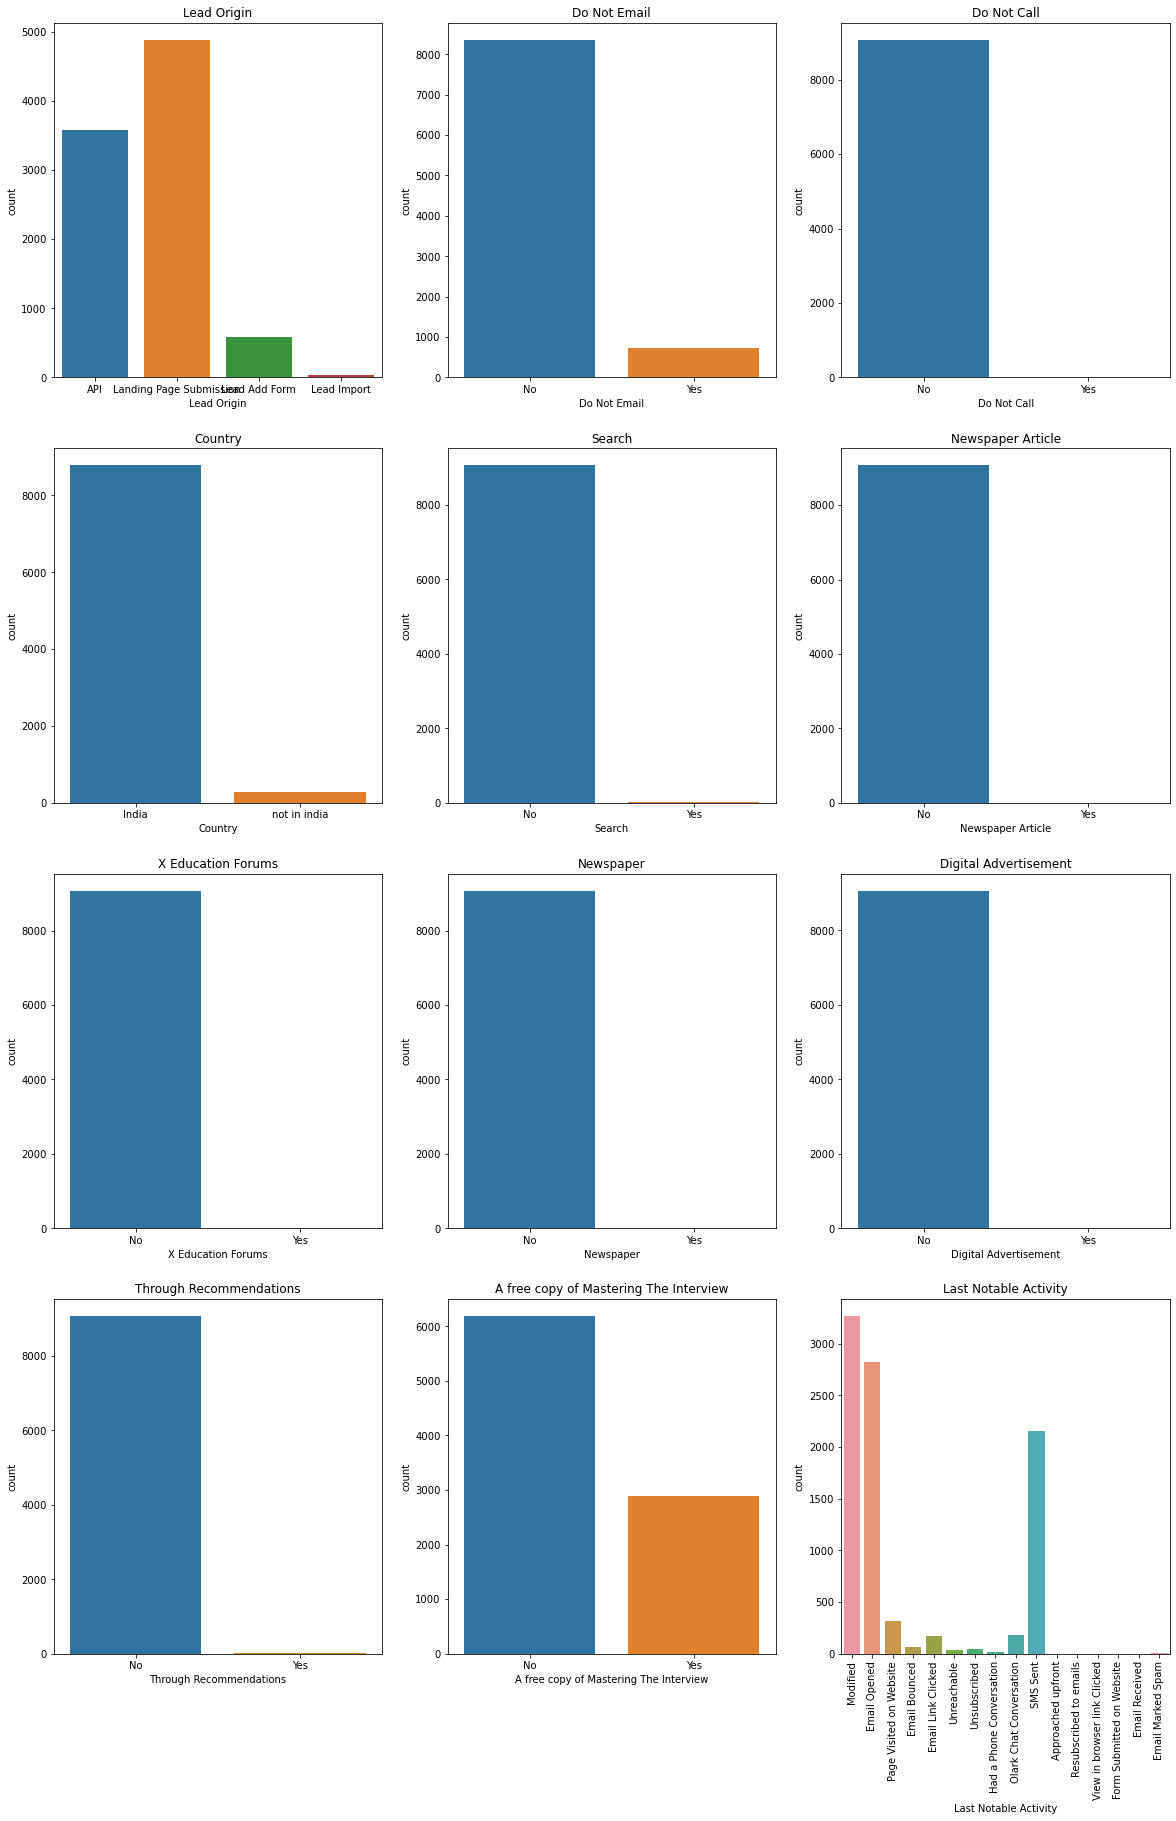

In [31]:
plt.figure(figsize = (20,30))

plt.subplot(4,3,1)
sns.countplot(ld_df["Lead Origin"])
plt.title("Lead Origin")

plt.subplot(4,3,2)
sns.countplot(ld_df["Do Not Email"])
plt.title("Do Not Email")

plt.subplot(4,3,3)
sns.countplot(ld_df["Do Not Call"])
plt.title("Do Not Call")

plt.subplot(4,3,4)
sns.countplot(ld_df["Country"])
plt.title("Country")

plt.subplot(4,3,5)
sns.countplot(ld_df["Search"])
plt.title("Search")

plt.subplot(4,3,6)
sns.countplot(ld_df["Newspaper Article"])
plt.title("Newspaper Article")

plt.subplot(4,3,7)
sns.countplot(ld_df["X Education Forums"])
plt.title("X Education Forums")

plt.subplot(4,3,8)
sns.countplot(ld_df["Newspaper"])
plt.title("Newspaper")

plt.subplot(4,3,9)
sns.countplot(ld_df["Digital Advertisement"])
plt.title("Digital Advertisement")

plt.subplot(4,3,10)
sns.countplot(ld_df["Through Recommendations"])
plt.title("Through Recommendations")

plt.subplot(4,3,11)
sns.countplot(ld_df["A free copy of Mastering The Interview"])
plt.title("A free copy of Mastering The Interview")

plt.subplot(4,3,12)
sns.countplot(ld_df["Last Notable Activity"]).tick_params(axis = 'x', rotation = 90)
plt.title("Last Notable Activity")

plt.show()

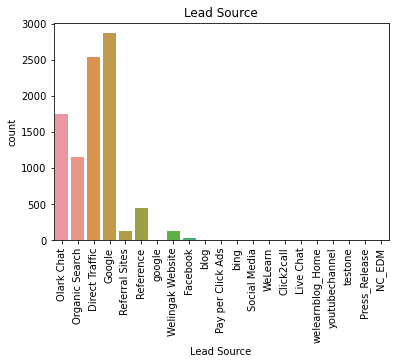

In [32]:
sns.countplot(ld_df["Lead Source"]).tick_params(axis = "x", rotation = 90)
plt.title("Lead Source")
plt.show()

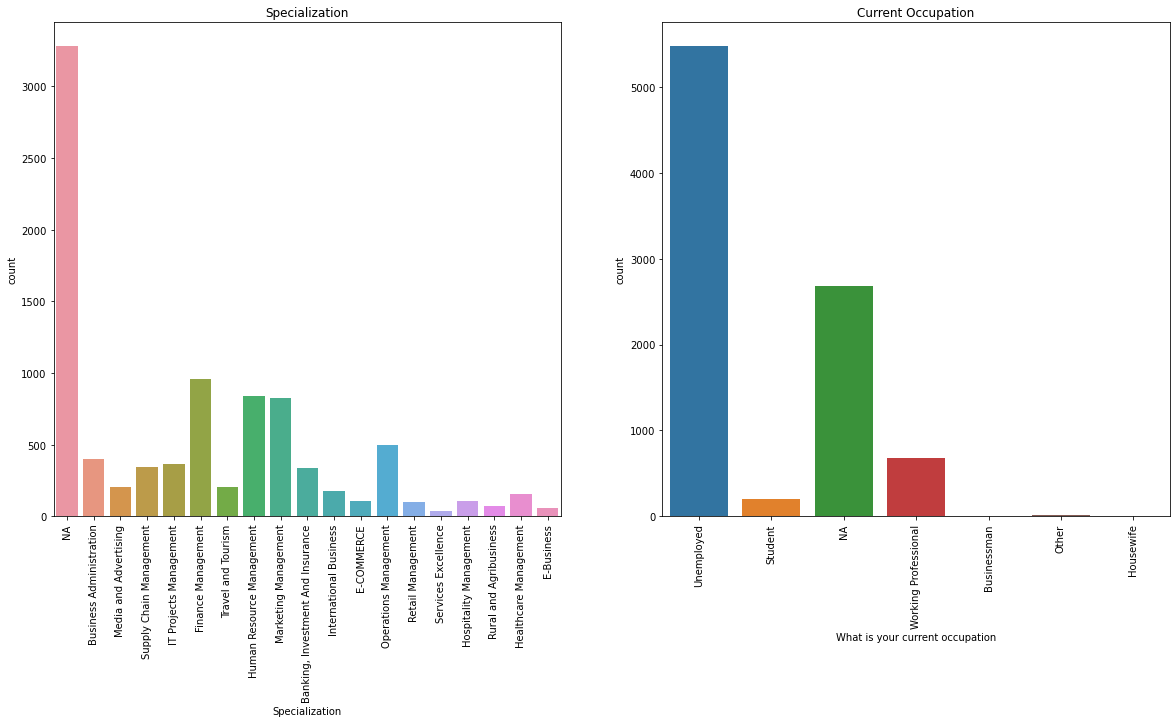

In [33]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(ld_df["Specialization"]).tick_params(axis = "x", rotation = 90)
plt.title("Specialization")

plt.subplot(2,2,2)
sns.countplot(ld_df["What is your current occupation"]).tick_params(axis = "x", rotation = 90)
plt.title("Current Occupation")

plt.show()

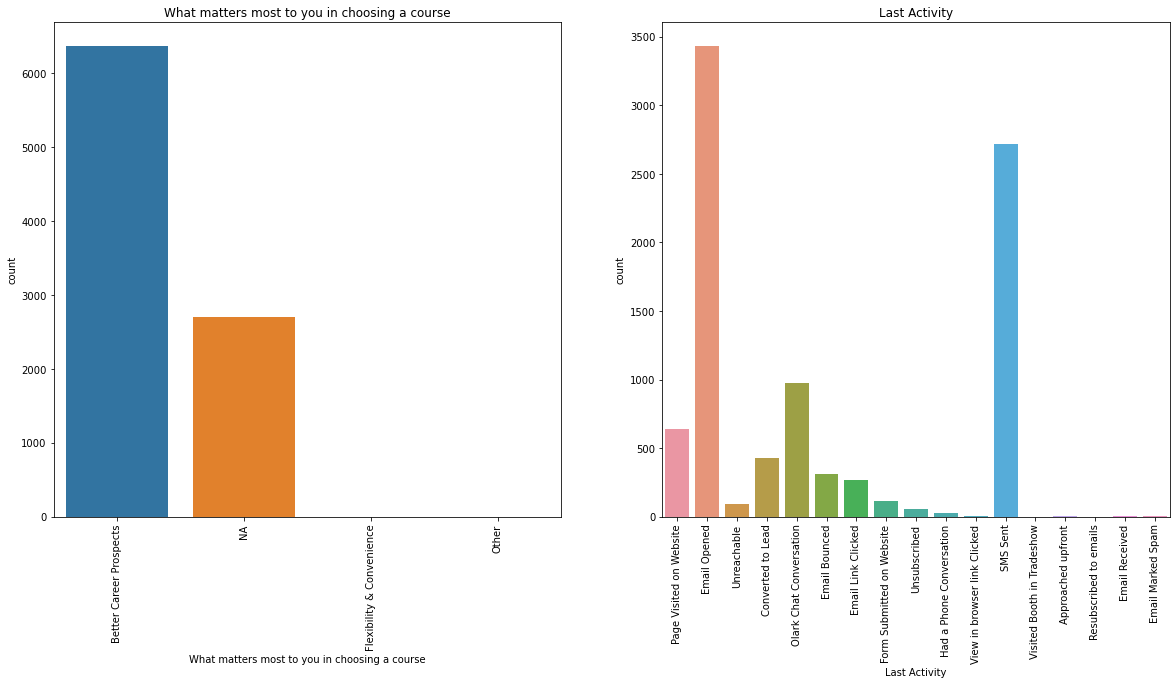

In [34]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,3)
sns.countplot(ld_df["What matters most to you in choosing a course"]).tick_params(axis = "x", rotation = 90)
plt.title("What matters most to you in choosing a course")

plt.subplot(2,2,4)
sns.countplot(ld_df["Last Activity"]).tick_params(axis = "x", rotation = 90)
plt.title("Last Activity")

plt.show()

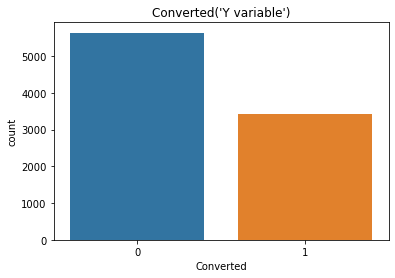

In [35]:
sns.countplot(ld_df["Converted"])
plt.title("Converted('Y variable')")
plt.show()

### Numerical Variables

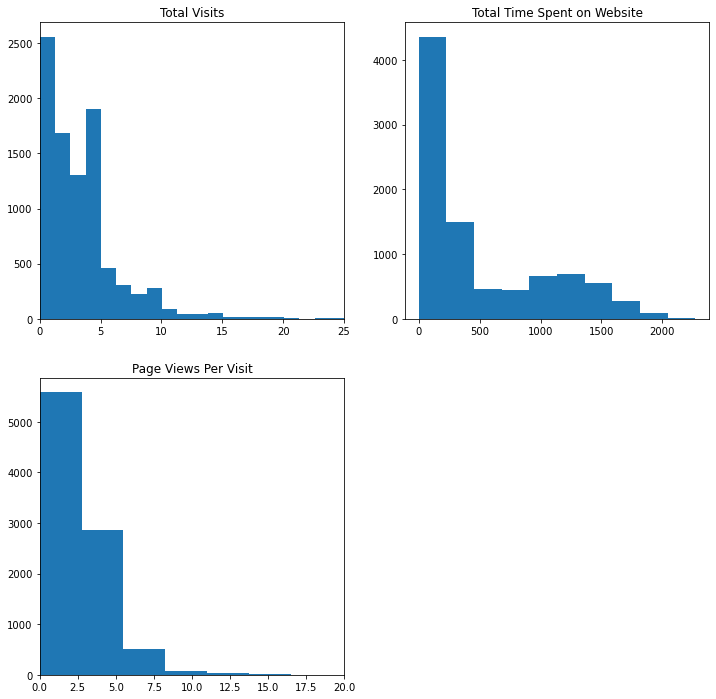

In [36]:
plt.figure(figsize = (12,12))

plt.subplot(221)
plt.hist(ld_df["TotalVisits"], bins = 200)
plt.title("Total Visits")
plt.xlim(0,25)

plt.subplot(222)
plt.hist(ld_df["Total Time Spent on Website"], bins = 10)
plt.title("Total Time Spent on Website")

plt.subplot(223)
plt.hist(ld_df["Page Views Per Visit"], bins = 20)
plt.title("Page Views Per Visit")
plt.xlim(0,20)

plt.show()

### Relating all categorical variables to converted

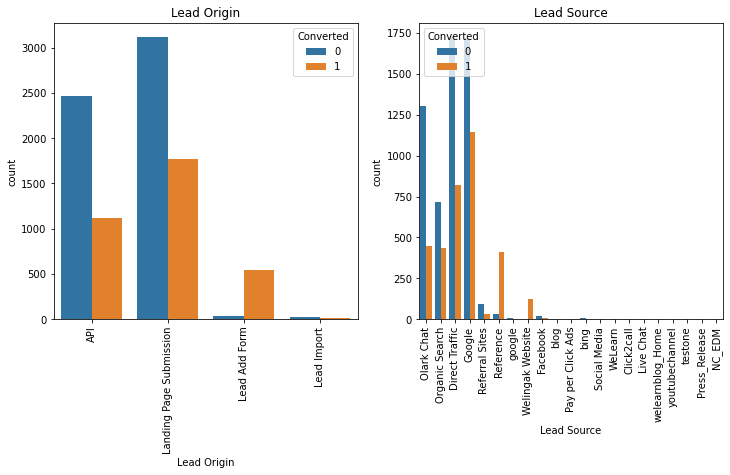

In [37]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.countplot(x = "Lead Origin", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Lead Origin")

plt.subplot(2,2,2)
sns.countplot(x = "Lead Source", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Lead Source")

plt.show()

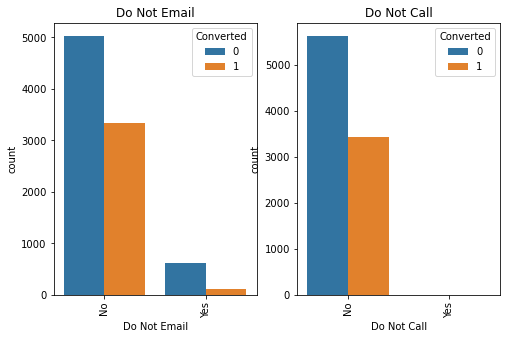

In [38]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Do Not Email")

plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Do Not Call")

plt.show()

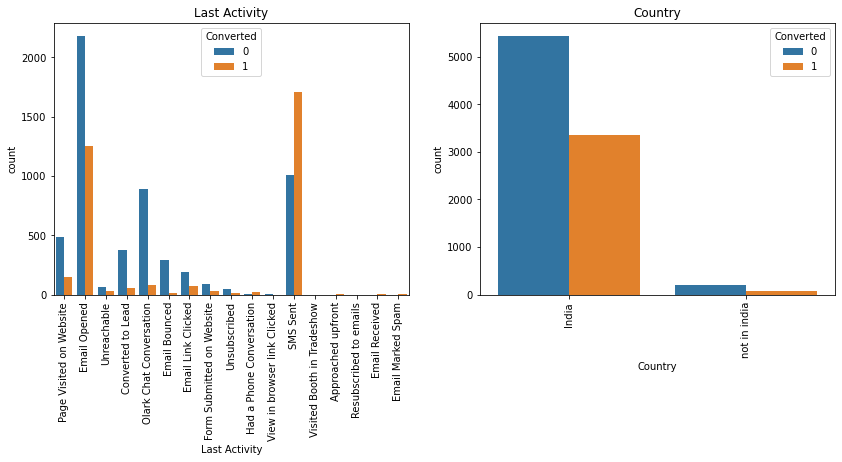

In [39]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.countplot(x = "Last Activity", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Last Activity")

plt.subplot(1,2,2)
sns.countplot(x = "Country", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Country")

plt.show()

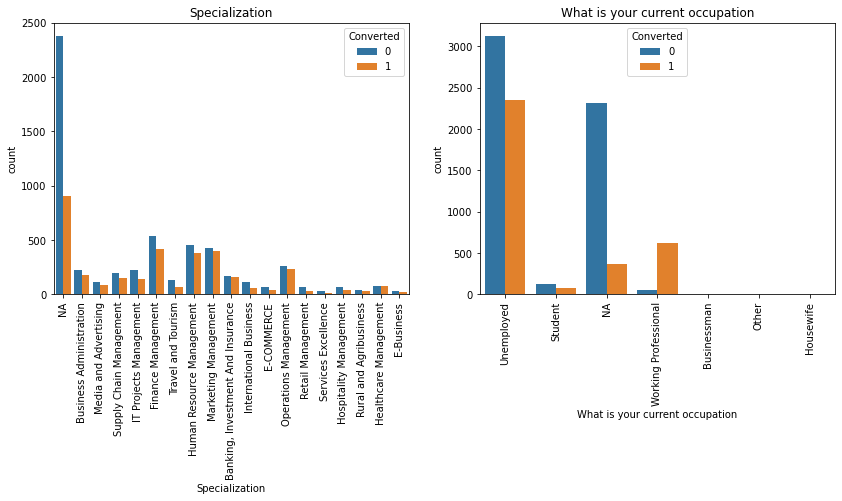

In [40]:
plt.figure(figsize = (14,5))

plt.subplot(1,2,1)
sns.countplot(x = "Specialization", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Specialization")

plt.subplot(1,2,2)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("What is your current occupation")

plt.show()

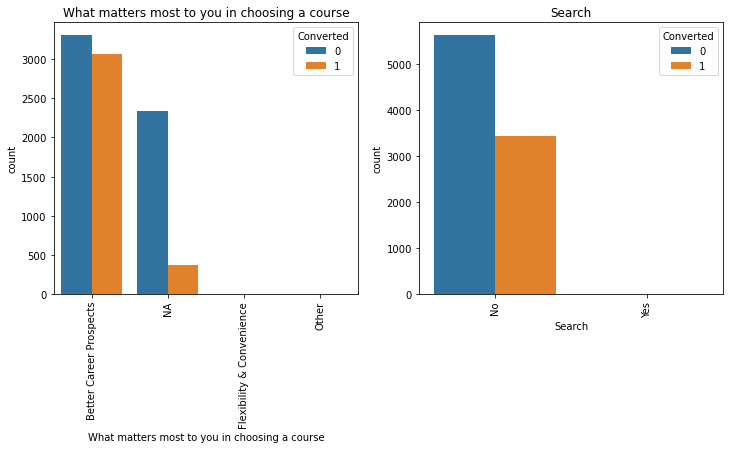

In [41]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("What matters most to you in choosing a course")

plt.subplot(1,2,2)
sns.countplot(x = "Search", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Search")

plt.show()

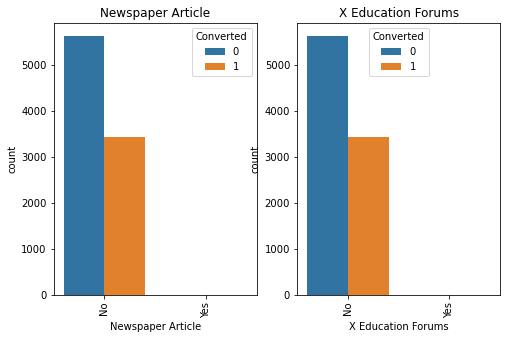

In [42]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Newspaper Article")

plt.subplot(1,2,2)
sns.countplot(x = "X Education Forums", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("X Education Forums")

plt.show()

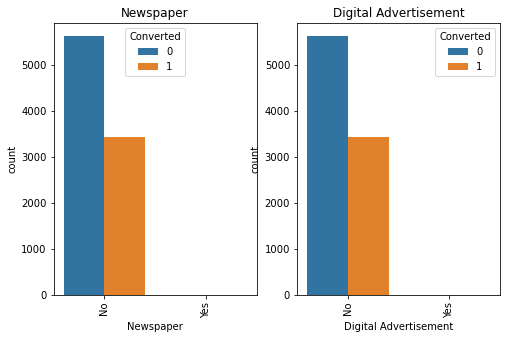

In [43]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(x = "Newspaper", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Newspaper")

plt.subplot(1,2,2)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Digital Advertisement")

plt.show()

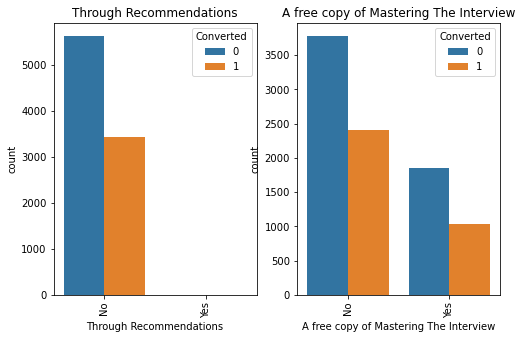

In [44]:
plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Through Recommendations")

plt.subplot(1,2,2)
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("A free copy of Mastering The Interview")

plt.show()

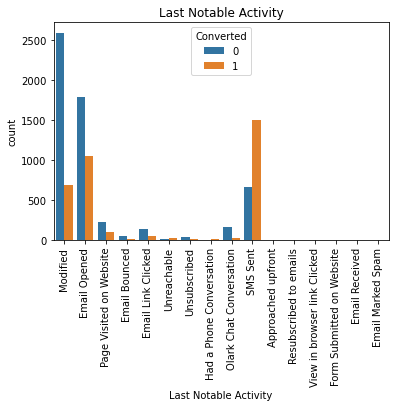

In [45]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = ld_df).tick_params(axis = "x", rotation = 90)
plt.title("Last Notable Activity")

plt.show()

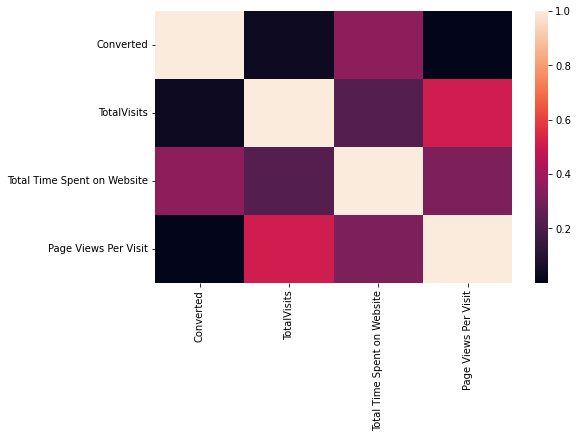

In [46]:
# Checking the correlation among varibles

plt.figure(figsize=(8,5))
sns.heatmap(ld_df.corr())

plt.show()

#### Comment
- It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

### Outliers

In [47]:
numeric = ld_df[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]
numeric.describe ( percentiles = [0.25,0.5,0.75,0.9,0.99] )

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


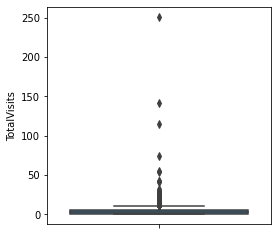

In [48]:
plt.figure(figsize = (4,4))
sns.boxplot(y = ld_df["TotalVisits"])

plt.show()

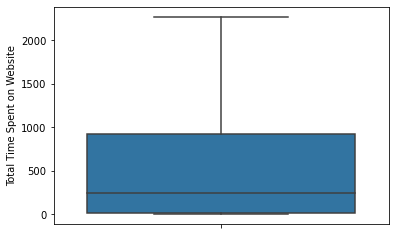

In [49]:
sns.boxplot(y = ld_df["Total Time Spent on Website"])

plt.show()

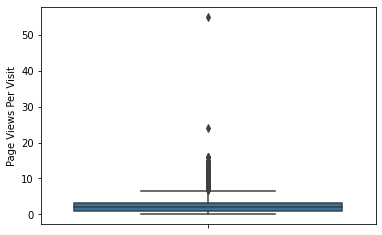

In [50]:
sns.boxplot(y = ld_df["Page Views Per Visit"])

plt.show()

#### Comment
- Outliners are present in TotalVisits

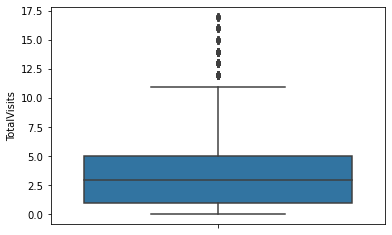

In [51]:
# Outlier Treatment: Remove top and bottom 1 percent values of the column outlier

Q3 = ld_df.TotalVisits.quantile(0.99)
ld_df = ld_df[(ld_df.TotalVisits <= Q3)]

Q1 = ld_df.TotalVisits.quantile(0.01)
ld_df = ld_df[(ld_df.TotalVisits >= Q1)]

sns.boxplot(y = ld_df["TotalVisits"])
plt.show()

### Dummy Variables

In [52]:
# Dropping the list of columns

colums_to_drop = ["Country","Tags"]

#### Comment
- Dropping "Tags", As tags variable is generated by the sales sales team after the disscussion with student otherwise it will increase the model accuracy.

In [53]:
# Columns Dropped

ld_df = ld_df.drop(colums_to_drop, 1)
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [54]:
# Obtaining a list of categorical columns

cc= ld_df.select_dtypes(include = ["object"]).columns
cc

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [55]:
# Dummy variables created using the 'get_dummies'

dummy = pd.get_dummies(ld_df[["Lead Origin","Specialization","Lead Source","Do Not Email","Last Activity","What is your current occupation","A free copy of Mastering The Interview","Last Notable Activity"]], drop_first=True)

# Results added to the master dataframe

ld_df_dum = pd.concat([ld_df, dummy], axis=1)
ld_df_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NA,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,NA,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,NA,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [56]:
ld_df_dum.drop(['City','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1, inplace = True)
ld_df_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Split Test-Train

In [57]:
#Imported Required Library

from sklearn.model_selection import train_test_split

In [58]:
X = ld_df_dum.drop(["Converted"], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [59]:
# Putting the target variable in y

y = ld_df_dum["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Split the dataset into 70 percent and 30 percent for train & test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [61]:
# Imported MinMax scaler

from sklearn.preprocessing import MinMaxScaler

# Scale the 3 numeric features

scaler = MinMaxScaler()
X_train[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]] = scaler.fit_transform(X_train[["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website"]])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [62]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [63]:
# Import RFE
from sklearn.feature_selection import RFE

In [64]:
# Running RFE with 20 variables as output
rfe = RFE(lr,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [65]:
# Features that are selected by RFE
list(zip(X_train.columns, rfe.ranking_))

[('TotalVisits', 1),
 ('Total Time Spent on Website', 1),
 ('Page Views Per Visit', 1),
 ('Lead Origin_Landing Page Submission', 1),
 ('Lead Origin_Lead Add Form', 1),
 ('Lead Origin_Lead Import', 35),
 ('Specialization_Business Administration', 58),
 ('Specialization_E-Business', 26),
 ('Specialization_E-COMMERCE', 55),
 ('Specialization_Finance Management', 39),
 ('Specialization_Healthcare Management', 49),
 ('Specialization_Hospitality Management', 20),
 ('Specialization_Human Resource Management', 60),
 ('Specialization_IT Projects Management', 54),
 ('Specialization_International Business', 57),
 ('Specialization_Marketing Management', 40),
 ('Specialization_Media and Advertising', 21),
 ('Specialization_NA', 1),
 ('Specialization_Operations Management', 47),
 ('Specialization_Retail Management', 15),
 ('Specialization_Rural and Agribusiness', 59),
 ('Specialization_Services Excellence', 37),
 ('Specialization_Supply Chain Management', 56),
 ('Specialization_Travel and Tourism', 

In [66]:
# Putting all columns selected by RFE in the variable 'column'
column = X_train.columns[rfe.support_]

#### Comment
- All the variables selected by RFE
- Next statistics part (p-values and the VIFs)

In [67]:
# Selecting columns selected by RFE
X_train = X_train[column]

In [68]:
# Imported statsmodels
import statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.0
Date:                Tue, 15 Nov 2022   Deviance:                       4972.0
Time:                        18:26:58   Pearson chi2:                 6.42e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4149
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1584      0.167      0.946      0.344      -0.170       0.487
TotalVisits                                              1.7453      0.305      5.718      0.000       1.147       2.344
Total Time Spent on Website                              4.6419      0.173     26.769      0.000       4.302       4.982
Page Views Per Visit                                    -2.0242      0.454     -4.458      0.000      -2.914      -1.134
Lead Origin_Landing Page Submission                     -0.9029      0.132     -6.845      0.000      -1.161      -0.644
Lead Origin_Lead Add Form                                3.5700      0.273     13.090      0.000       3.035       4.105
Specialization_NA                                       -0.8712      0.130     -6.716      0.000      -1.125      -0.617
Lead Source_Olark Chat                                   1.2754      0.139      9.148      0.000       1.002       1.549
Lead Source_Welingak Website                             2.9199      1.042      2.802      0.005       0.878       4.962
Do Not Email_Yes                                        -1.4347      0.209     -6.858      0.000      -1.845      -1.025
Last Activity_Email Bounced                             -1.1192      0.397     -2.817      0.005      -1.898      -0.341
Last Activity_Olark Chat Conversation                   -1.2789      0.200     -6.392      0.000      -1.671      -0.887
What is your current occupation_Housewife               23.1534   2.87e+04      0.001      0.999   -5.63e+04    5.63e+04
What is your current occupation_NA                      -0.9741      0.090    -10.871      0.000      -1.150      -0.798
What is your current occupation_Working Professional     2.4057      0.193     12.437      0.000       2.027       2.785
Last Notable Activity_Email Link Clicked                -1.9659      0.270     -7.269      0.000      -2.496      -1.436
Last Notable Activity_Email Opened                      -1.3801      0.091    -15.145      0.000      -1.559      -1.202
Last Notable Activity_Had a Phone Conversation          22.1321   2.12e+04      0.001      0.999   -4.16e+04    4.17e+04
Last Notable Activity_Modified                          -1.7131      0.101    -17.045      0.000      -1.910      -1.516
Last Notable Activity_Olark Chat Conversation           -1.3822      0.388     -3.566      0.000      -2.142      -0.622
Last Notable Activity_Page Visited on Website           -2.0388      0.221     -9.228      0.000      -2.472      -1.606
========================================================================================================================
"""

In [70]:
# Imported 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
0,TotalVisits,5.32
3,Lead Origin_Landing Page Submission,4.13
5,Specialization_NA,2.96
17,Last Notable Activity_Modified,2.60
6,Lead Source_Olark Chat,2.21
1,Total Time Spent on Website,2.13
15,Last Notable Activity_Email Opened,2.06
10,Last Activity_Olark Chat Conversation,2.00
8,Do Not Email_Yes,1.93


#### Comment
- The VIF values seem fine but some p-values are 99 percent.
- So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.

In [72]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)


In [73]:
# Refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2491.1
Date:                Tue, 15 Nov 2022   Deviance:                       4982.3
Time:                        18:26:59   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4139
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1714      0.167      1.025      0.305      -0.156       0.499
TotalVisits                                              1.7393      0.304      5.713      0.000       1.143       2.336
Total Time Spent on Website                              4.6407      0.173     26.787      0.000       4.301       4.980
Page Views Per Visit                                    -2.0258      0.453     -4.467      0.000      -2.915      -1.137
Lead Origin_Landing Page Submission                     -0.9033      0.132     -6.857      0.000      -1.162      -0.645
Lead Origin_Lead Add Form                                3.5835      0.273     13.150      0.000       3.049       4.118
Specialization_NA                                       -0.8779      0.130     -6.773      0.000      -1.132      -0.624
Lead Source_Olark Chat                                   1.2724      0.139      9.129      0.000       0.999       1.546
Lead Source_Welingak Website                             2.9041      1.042      2.787      0.005       0.862       4.946
Do Not Email_Yes                                        -1.4420      0.209     -6.891      0.000      -1.852      -1.032
Last Activity_Email Bounced                             -1.1186      0.397     -2.816      0.005      -1.897      -0.340
Last Activity_Olark Chat Conversation                   -1.2798      0.200     -6.396      0.000      -1.672      -0.888
What is your current occupation_NA                      -0.9783      0.090    -10.919      0.000      -1.154      -0.803
What is your current occupation_Working Professional     2.4005      0.193     12.413      0.000       2.021       2.780
Last Notable Activity_Email Link Clicked                -1.9628      0.269     -7.296      0.000      -2.490      -1.436
Last Notable Activity_Email Opened                      -1.3843      0.091    -15.210      0.000      -1.563      -1.206
Last Notable Activity_Modified                          -1.7162      0.100    -17.096      0.000      -1.913      -1.519
Last Notable Activity_Olark Chat Conversation           -1.3847      0.388     -3.571      0.000      -2.145      -0.625
Last Notable Activity_Page Visited on Website           -2.0452      0.221     -9.260      0.000      -2.478      -1.612
========================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.05
0,TotalVisits,5.31
3,Lead Origin_Landing Page Submission,4.13
5,Specialization_NA,2.96
15,Last Notable Activity_Modified,2.60
6,Lead Source_Olark Chat,2.21
1,Total Time Spent on Website,2.13
14,Last Notable Activity_Email Opened,2.05
10,Last Activity_Olark Chat Conversation,2.00
8,Do Not Email_Yes,1.93


In [75]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)


In [76]:
# Refitting the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.3
Date:                Tue, 15 Nov 2022   Deviance:                       5002.5
Time:                        18:26:59   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4120
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0227      0.161     -0.141      0.888      -0.339       0.293
TotalVisits                                              0.9619      0.250      3.852      0.000       0.472       1.451
Total Time Spent on Website                              4.6272      0.173     26.765      0.000       4.288       4.966
Lead Origin_Landing Page Submission                     -0.9478      0.131     -7.221      0.000      -1.205      -0.691
Lead Origin_Lead Add Form                                3.7432      0.270     13.844      0.000       3.213       4.273
Specialization_NA                                       -0.8584      0.129     -6.638      0.000      -1.112      -0.605
Lead Source_Olark Chat                                   1.4170      0.136     10.434      0.000       1.151       1.683
Lead Source_Welingak Website                             2.8927      1.042      2.776      0.005       0.851       4.935
Do Not Email_Yes                                        -1.4704      0.208     -7.069      0.000      -1.878      -1.063
Last Activity_Email Bounced                             -1.0318      0.394     -2.617      0.009      -1.804      -0.259
Last Activity_Olark Chat Conversation                   -1.2717      0.200     -6.370      0.000      -1.663      -0.880
What is your current occupation_NA                      -0.9777      0.089    -10.937      0.000      -1.153      -0.802
What is your current occupation_Working Professional     2.3998      0.194     12.399      0.000       2.020       2.779
Last Notable Activity_Email Link Clicked                -1.9085      0.267     -7.146      0.000      -2.432      -1.385
Last Notable Activity_Email Opened                      -1.3533      0.090    -14.962      0.000      -1.531      -1.176
Last Notable Activity_Modified                          -1.6854      0.100    -16.875      0.000      -1.881      -1.490
Last Notable Activity_Olark Chat Conversation           -1.3012      0.383     -3.398      0.001      -2.052      -0.551
Last Notable Activity_Page Visited on Website           -1.8450      0.213     -8.660      0.000      -2.263      -1.427
========================================================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.65
0,TotalVisits,3.04
4,Specialization_NA,2.88
14,Last Notable Activity_Modified,2.59
5,Lead Source_Olark Chat,2.17
1,Total Time Spent on Website,2.11
13,Last Notable Activity_Email Opened,2.05
9,Last Activity_Olark Chat Conversation,2.00
7,Do Not Email_Yes,1.92
8,Last Activity_Email Bounced,1.85


### Obesrvation
- All the VIF values are good and all the p-values are below 0.05, So we can fix model.

### Creating Prediction


In [78]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.521707
3267    0.996842
5653    0.415565
5072    0.142458
3704    0.130351
1790    0.021647
2482    0.183450
1694    0.106489
8768    0.114817
9225    0.007434
dtype: float64

In [79]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52170657, 0.99684233, 0.41556487, 0.14245835, 0.13035112,
       0.02164682, 0.18345024, 0.10648872, 0.11481676, 0.0074344 ])

In [80]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.521707
1,1,0.996842
2,1,0.415565
3,0,0.142458
4,0,0.130351


In [81]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.521707,1
1,1,0.996842,1
2,1,0.415565,0
3,0,0.142458,0
4,0,0.130351,0


### Evaluating Model

In [82]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [83]:
# Confusion matrix created
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  429],
       [ 696, 1682]], dtype=int64)

#### Obesrvation
#### Predicted        No         Yes
#### Actual
#### No              3498      417
#### Yes             837      1541

In [84]:
# Overall accuracy checked
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8212299380263786

#### Comment
- Around 82% accuracy with is a very good value

In [85]:
# False negatives values substituted
TP = confusion[1,1]

# False negatives values substituted
TN = confusion[0,0]

# False negatives values substituted
FP = confusion[0,1]

# False negatives values substituted
FN = confusion[1,0]

In [86]:
# Sensitivity calculated
TP/(TP+FN)

0.7073170731707317

In [87]:
# Specificity calculated
TN/(TN+FP)

0.8904214559386974

#### Comment
- With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 71% and specificity of around 89%.

### Optimise Cut off (ROC Curve)

#### The previous cut off was randomely selected. Now finding the optimum one.

In [88]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


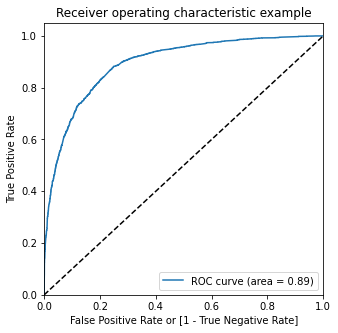

In [90]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Comment
- The area under ROC curve is 0.89 which is a very good value

In [91]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.521707,1,1,1,1,1,1,1,0,0,0,0
1,1,0.996842,1,1,1,1,1,1,1,1,1,1,1
2,1,0.415565,0,1,1,1,1,1,0,0,0,0,0
3,0,0.142458,0,1,1,0,0,0,0,0,0,0,0
4,0,0.130351,0,1,1,0,0,0,0,0,0,0,0


In [92]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.623550,0.973928,0.410728
0.2,0.2,0.771651,0.915475,0.684291
0.3,0.3,0.803432,0.867115,0.764751
0.4,0.4,0.815668,0.775442,0.840102
0.5,0.5,0.821230,0.707317,0.890421
0.6,0.6,0.811219,0.629100,0.921839
0.7,0.7,0.788972,0.521026,0.951724
0.8,0.8,0.769267,0.438183,0.970370
0.9,0.9,0.728905,0.304037,0.986973


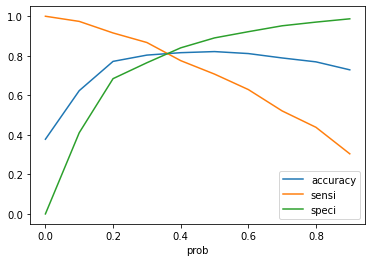

In [93]:
# Plotting
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Comment
- From the graph it is visible that the optimal cut off is at 0.35.

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.521707,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996842,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.415565,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.142458,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.130351,0,1,1,0,0,0,0,0,0,0,0,0


In [95]:
# Overall accuracy checked
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812807881773399

In [96]:
# Confusion matrix created
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3174,  741],
       [ 437, 1941]], dtype=int64)

In [97]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [98]:
# Calculating the sensitivity
TP/(TP+FN)

0.8162321278385197

In [99]:
# Calculating the specificity
TN/(TN+FP)

0.810727969348659

#### Comment
- With the current cut off as 0.35 we have accuracy of around 81%, sensitivity of around 82% and specificity of around 81%.

### Test set Prediction

In [100]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [101]:
col = X_train.columns


In [102]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_NA,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_NA,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [103]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.053823
1,1,0.801282
2,1,0.484075
3,0,0.032332
4,0,0.283105


In [104]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.053823,0
1,1,0.801282,1
2,1,0.484075,1
3,0,0.032332,0
4,0,0.283105,0
...,...,...,...
2693,1,0.169505,0
2694,1,0.757221,1
2695,0,0.052691,0
2696,1,0.963868,1


In [105]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8124536693847294

In [106]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1352,  325],
       [ 181,  840]], dtype=int64)

In [107]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.8227228207639569

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.8062015503875969

#### Comment
- With the current cut off as 0.35 we have accuracy of around 81%, sensitivity of around 82% and specificity of around 81%

### Precision-Recall

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  429],
       [ 696, 1682]], dtype=int64)

In [111]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7967787778304122

In [112]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7073170731707317

#### Comment
- With the current cut off as 0.35 we have Precision around 80% and Recall around 71%

### Precision and recall tradeoff

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
y_train_pred_final.Converted, y_train_pred_final.Predicted


(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


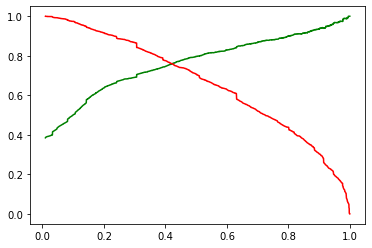

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.521707,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.996842,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.415565,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.142458,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.130351,0,1,1,0,0,0,0,0,0,0,0,0


In [118]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8167805498172572

In [119]:
# Creating confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3315,  600],
       [ 553, 1825]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7525773195876289

In [122]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7674516400336417

#### Comment
- With the current cut off as 0.41 we have Accuracy around 82%, Precision around 75% and Recall around 77%.

### Prediction on Test set

In [123]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.053823
1,1,0.801282
2,1,0.484075
3,0,0.032332
4,0,0.283105


In [124]:
# Making prediction using cut off 0.41

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.053823,0
1,1,0.801282,1
2,1,0.484075,1
3,0,0.032332,0
4,0,0.283105,0
...,...,...,...
2693,1,0.169505,0
2694,1,0.757221,1
2695,0,0.052691,0
2696,1,0.963868,1


### Check the overall accuracy

In [125]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.815418828762046

In [126]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1411,  266],
       [ 232,  789]], dtype=int64)

In [127]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [128]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.747867298578199

In [129]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7727717923604309

#### Comment
- With the current cut off as 0.41 we have Accuracy 82%, Precision around 75% , Recall around 77%.
- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

## Conclusion

### It was found that the variables that mattered the most in the potential buyers are (In descending order) :

- TotalVisits
- The total time spend on the Website.
- Lead Origin_Lead Add Form
- Lead Source_Direct Traffic
- Lead Source_Google
- Lead Source_Organic Search
- Lead Source_Referral Sites
- Lead Source_Welingak Website
- Do Not Email_Yes
- Last Activity_Email Bounced
- Last Activity_Olark Chat Conversation

### Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.